In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/junyuwu/Chipotle Project/components/chipotle.csv")

In [3]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
df.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [5]:
df["ip"] = df["item_price"].str.split("$").apply(lambda x : x[1]).astype(float)

In [6]:
df

,order_id,quantity,item_name,choice_description,item_price,ip
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


In [7]:
df["item_price"] = df["item_price"].str.strip("$").astype(float)

In [9]:
df.groupby("item_name")["quantity"].sum().sort_values(ascending=False).to_frame()[:5]

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [10]:
#top_rev = df.groupby("item_name")["ip"].sum().to_frame().sort_values("ip",ascending=False)[:5]
#top_rev

In [13]:
top_rev = df.groupby("item_name")["ip"].sum(
).to_frame().sort_values("ip", ascending=False)[:5]
top_rev.reset_index(inplace=True)
top_rev.rename(columns={'item_name': 'item'}, inplace=True)
top_rev

,item,ip
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Steak Bowl,2260.19
4,Chips and Guacamole,2201.04


<IPython.core.display.Javascript object>


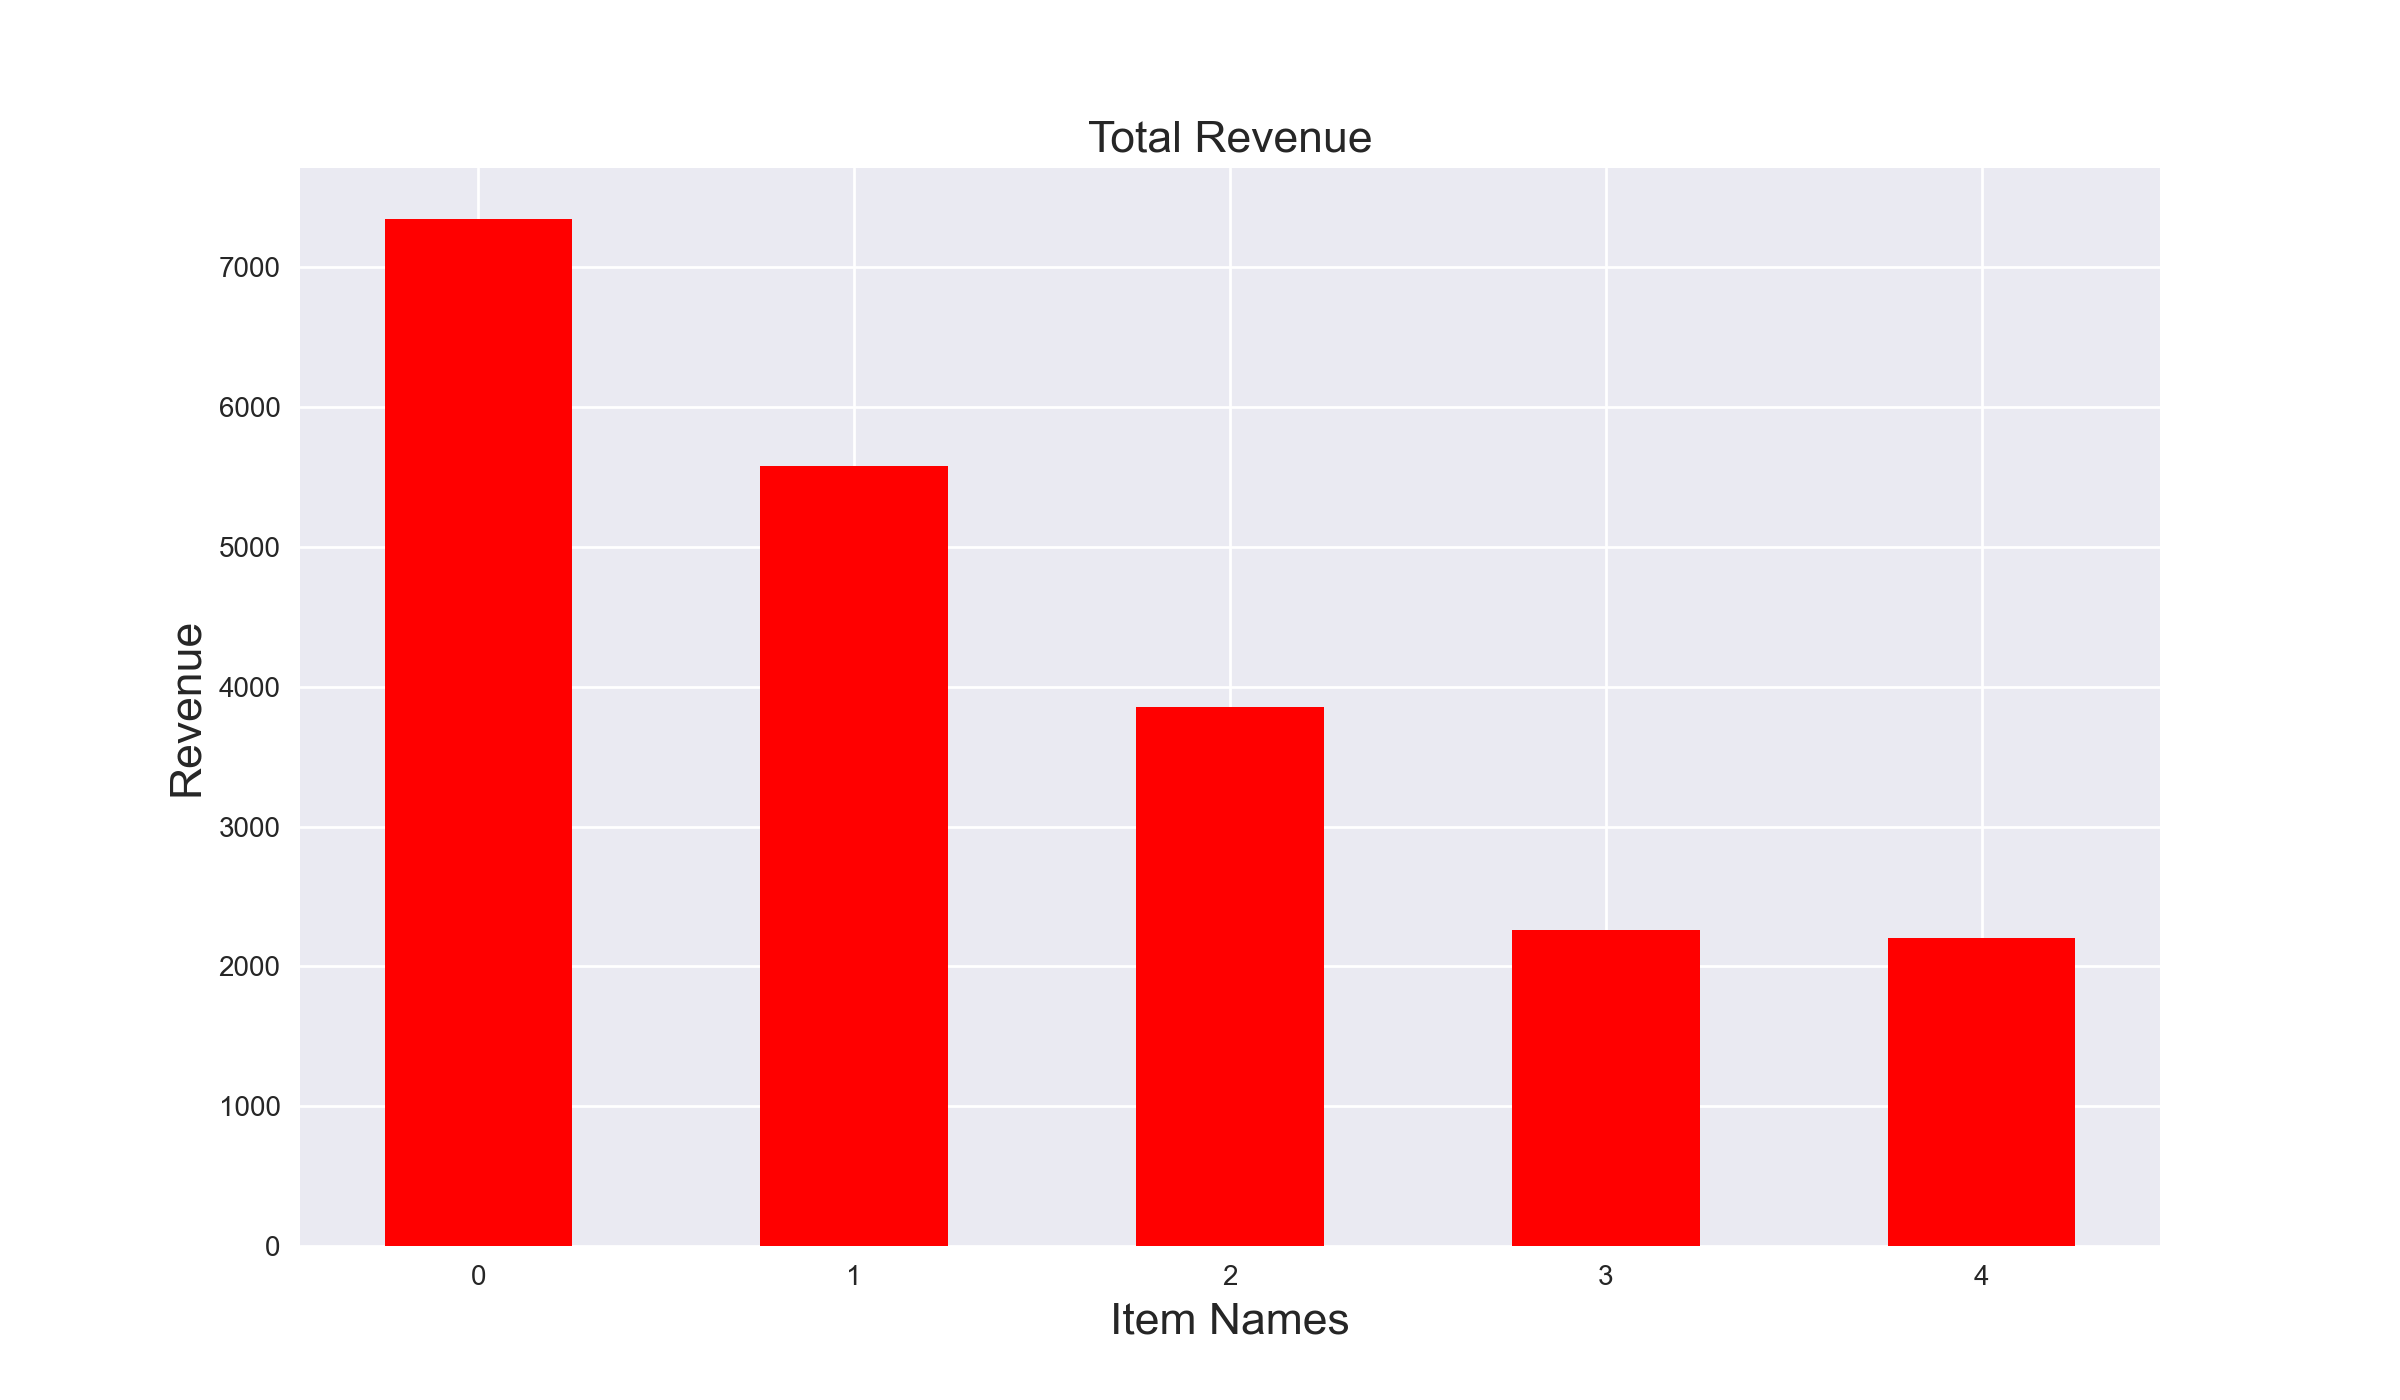

/var/folders/tr/00d44tjd3wz1f_ccm0ktlwp80000gn/T/ipykernel_83451/3756118110.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [14]:
x_axis = top_rev.index
y_axis = top_rev["ip"]
plt.figure(figsize=(12, 7))
plt.style.use('seaborn')
plt.bar(x_axis, y_axis, width=0.5, color="red")
plt.title('Total Revenue',fontsize=16)
plt.xlabel('Item Names',fontsize=16)
plt.ylabel('Revenue',fontsize=16);

In [15]:
df

,order_id,quantity,item_name,choice_description,item_price,ip
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [17]:
df.groupby("order_id")["item_price"].value_counts().to_frame()[:10]

item_price
order_id item_price            
1        2.39                 2
         3.39                 2
2        16.98                1
3        1.69                 1
         10.98                1
4        9.25                 1
         11.75                1
5        4.45                 1
         9.25                 1
6        8.75                 2